# Getting Started with Qiskit

Qiskit consist of two stages:
    Build the circuit and
    Execute the circuit

## **<font style="color:rgb(9, 99, 184)"> Download and Import Libraries </font>** 

In [ ]:
!pip install numpy
!pip install qiskit

In [36]:
import numpy as np
from qiskit import *

## **<font style="color:rgb(9, 99, 184)"> Build the circuit </font>** 

In [28]:
cir= QuantumCircuit(3)

In [29]:
cir.h(0)
cir.cx(0,1)
cir.cx(0,2)

## **<font style="color:rgb(9, 99, 184)"> Circuit Visualization </font>** 

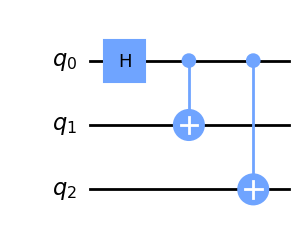

In [34]:
cir.draw('mpl')

# Simulating the circuit 

## **<font style="color:rgb(9, 99, 184)">State Vector Backend </font>** 

- **Calculates the statevector that represents the quantum circuit.**
- **The statevector describes the probability amplitudes of all possible states of the quantum circuit.**
- **Useful for analyzing and simulating small quantum circuits.**
- **Supports measurements and classical control operations, but cannot simulate the effects of noise or errors in the quantum hardware.**

In [8]:
from qiskit import Aer

In [11]:
backend= Aer.get_backend('statevector_simulator')
job= backend.run(cir)

In [35]:
result= job.result()


In [108]:
backend_sim= Aer.get_backend('qasm_simulator')
job_sim= backend_sim.run(transpile(qc,backend_sim), shots=1024)
result_sim= job_sim.result()
counts= result_sim.get_counts(qc)
print(counts)

{'111': 496, '000': 528}


## **<font style="color:rgb(9, 99, 184)">Get the vector for the quantum circuit </font>** 

In [21]:
outputstate =result.get_statevector(cir,decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


## **<font style="color:rgb(9, 99, 184)"> Visualization of the state density matrix  </font>** 
- The density matrix is a matrix representation of the quantum state.
- The state density matrix describes the quantum state of a system in a mixed state (i.e., a probabilistic mixture of pure states).
- The density matrix is a matrix representation of the quantum state.
- The density matrix can be visualized using a heat map, where the color of each cell represents the magnitude and phase of the corresponding matrix element.
- The diagonal elements of the density matrix represent the probabilities of measuring the system in a specific state.
- Off-diagonal elements represent the coherence between different states.
- The density matrix can be visualized using a 3D plot, where the x and y axes represent the states, and the z-axis represents the magnitude and phase of the corresponding matrix element.
- Visualization of the density matrix can aid in understanding the properties of a quantum system, such as entanglement and coherence.
- The state tomography technique can also be used to reconstruct the density matrix from measurement data, which can be visualized using the techniques mentioned above.

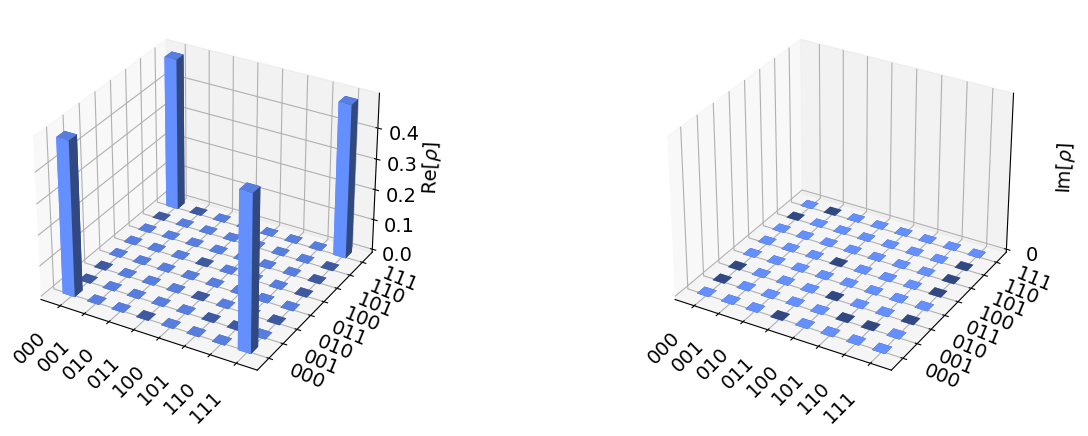

In [73]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## **<font style="color:rgb(9, 99, 184)">Mathematical representation of the quantum circuit </font>** 

`->:` **state.draw('latex')  This line generates a visualization of the resulting state using LaTeX notation. The output is a LaTeX code snippet that can be rendered as a mathematical expression in a LaTeX document or typesetting system.**

In [62]:
from qiskit.quantum_info import Statevector
#set initial state of simulator to the ground state using init 
state= Statevector.from_int(0,2**3)
state= state.evolve(cir)
state.draw('latex')

<IPython.core.display.Latex object>

`->:`**Matrix in a visually appealing format**

In [65]:
from qiskit.visualization import array_to_latex
array_to_latex(state)

<IPython.core.display.Latex object>

## **<font style="color:rgb(9, 99, 184)"> Q Sphere Visulization  </font>** 
- **Each quadrant is a qubit combination.**
- **Quadrants are associated with colors.**
- **Point position shows amplitude and phase.**
- **Larger points indicate higher amplitude.**
- **Angle shows phase, x-axis is 0 degrees.**
- **Q-sphere visualizes single and multi-qubit states.**
- **Helps in understanding and optimizing quantum algorithms.**

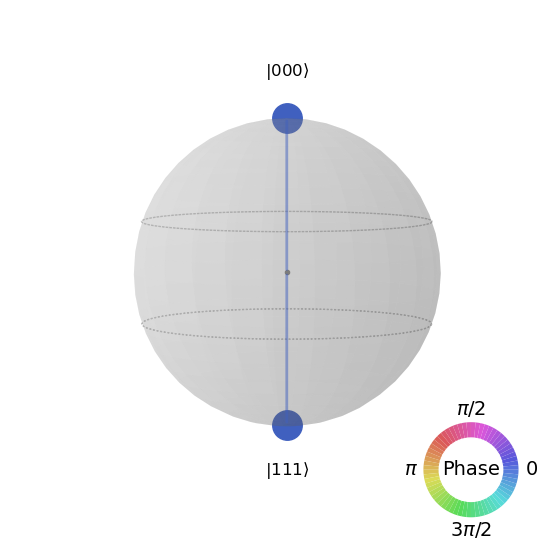

In [74]:
state.draw('qsphere')

## **<font style="color:rgb(9, 99, 184)"> Hinton Visualization  </font>** 
- **Created by Geoff Hinton in the 1980s.**
- **Shows a matrix as a grid of squares.**
- **Square size represents the absolute value of the matrix element.**
- **Square color represents the sign of the element (black for negative, white for positive).**
- **Useful for visualizing weight matrices in neural networks.**
- **Can help to identify patterns and clusters of weights in the matrix.**

***A hinton representing the real and imaginary components of the state density matrix p***


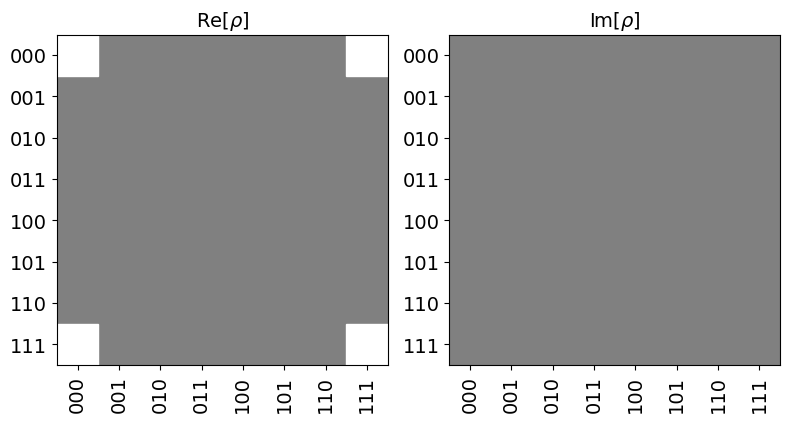

In [69]:
state.draw('hinton')

## **<font style="color:rgb(9, 99, 184)"> Unitary backend  </font>** 

- **Calculates the unitary matrix that represents the quantum circuit.**
- **The unitary matrix describes how the quantum circuit transforms the input state into the output state.**
- **Useful for analyzing and optimizing small quantum circuits.**
- **Does not support measurements or classical control operations.**

In [37]:
backend = Aer.get_backend("unitary_simulator")
job= backend.run(cir)
result= job.result()

#showing the results
print(result.get_unitary(cir, decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

## **<font style="color:rgb(9, 99, 184)"> OpenQASM backend  </font>** 

- **Converts the quantum circuit into OpenQASM format, a low-level assembly language for quantum computers.**
- **Outputs a series of instructions in OpenQASM format that can be executed on a quantum device or simulator.**
- **Supports measurements and conditional operations.**

In [49]:
meas= QuantumCircuit(3,3)
meas.barrier(range(3))
#map the quantum measurment to the classical bits
meas.measure(range(3), range(3))

#The Qiskit circuit object supports composition using
# the compose method
# cir.add_register(meas.cregs[0])
qc= cir.compose(meas)
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

- **`   :`Simulation using Qasm**

In [75]:
backend_sim= Aer.get_backend('qasm_simulator')
job_sim= backend_sim.run(transpile(qc,backend_sim), shots=1024)
result_sim= job_sim.result()
counts= result_sim.get_counts(qc)
print(counts)

{'000': 528, '111': 496}


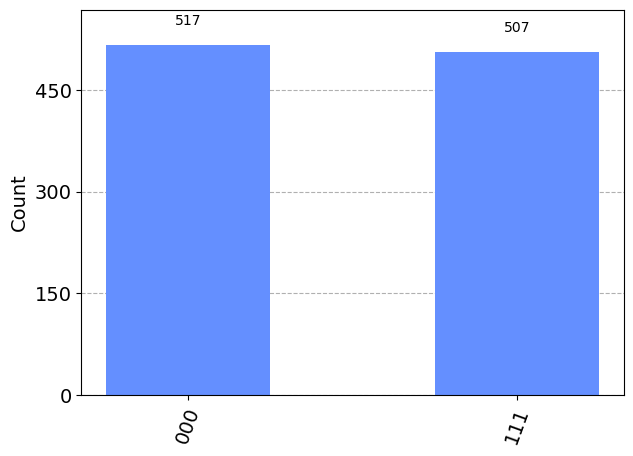

In [56]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [58]:
import qiskit.tools.jupyter
%qiskit_version_table